## 대표적인 연속형 확률 분포
- 연속형 확률분포
    - 정규분포
    - t-분포
    - 카이제곱분포
    - F-분포

- 정규분포(normal distribution)
    - 대표본 모집단의 합, 평균 추론 시 활용
- t-분포
    - 소표본 모집단 평균 추론 시 활용
    - 선형모형 회귀계수 추론(종속변수 정규분포 가정)시 활용
- 카이제곱(χ2)분포
    - 모집단 분산 추론 시(데이터 정규분포 가정) 활용
    - 카이제곱 검정 시 활용
- F-분포
    - 두 모집단 분산 차이 비교 시 활용(데이터 정규분포 가정)
    - 분산분석 시 활용
    - (설명하는 변동/설명하지 못하는 변동)이 F분포를 따름


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline


'%.3f'

In [12]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


In [13]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()


## 정규분포
- 가장 대표적인 분포
- 가우시안(Gaussian) 분포라고도 불리움
- 연속형 확률변수에 대한 분포
- 평균(μ)과 표준편차(σ)로 모양이 결정
- 좌우대칭, 종모양
- 평균 = 중앙값 = 최빈값
- 자연계, 사회현상에 많이 나타남

![](../picture/정규종.png)

![](../picture/정규비교.png)

## 정규분포의 확률밀도 함수 f(x)
![](../picture/정규수식.png)


- 확률밀도 함수
![](../picture/정규밀도.png)

In [14]:
def N(mu, sigma): # mu: 평균, sigma: 표준펴차
    x_range = [-np.inf, np.inf]
    
    def f(x):
        return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
    
    return x_range,f

In [15]:
# 평균이 2이고 편차가 0.5인 정규분포를 따르는  확률변수 X정의
mu = 2
sigma = 0.5
X = N(mu,sigma)

In [16]:
# 기대값과 분산을 출력해줌
check_prob(X)

expected vaue 2.000
variance 0.250


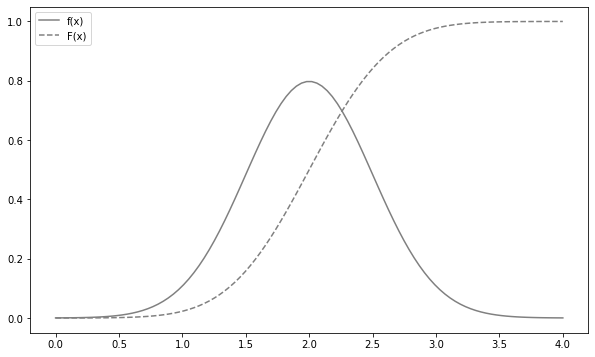

In [17]:
plot_prob(X,0,4)

- 남자 고등학생이  키의 평균이 170cm이고 표준편차가 5cm라면 우연히 만난 남자 고등학생의 키는 N(170,5^2)를 따른다고 할수 있음
- 남자 고등학생의 키 ~ N(170,5^2)
- 이 사실을 바탕으로 우연히 만남 남자 고등학생의 키가 165이상 175cm 이하일 확률
![](../picture/정규고등학생.png)

In [18]:
mu, sigma = 170, 5
X = N(mu,sigma)

x_range, f = X

np.round(integrate.quad(f,165,175)[0],6)

0.682689

- 모의고사 평균 점수가 70점이고 표준편차가 8점이라면, 우연히 만난 학생의 점수는 N(70,8^2)를 따른다고 함
- 모의고사 점수 ~ N(70,8^2)
- 위 사실을 바탕으로 우연히 만난 학생의 점수가 54점 이상 86점 이하일 경우
![](../picture/정규모의고사.png)

In [20]:
mu, sigma = 70, 8
X = N(mu,sigma)
x_range, f = X

np.round(integrate.quad(f,54,86)[0],6)

0.9545

## scipy.stats 사용해서 확인
- stats.norm(평균,표준편차) 정규분포를 따른 확률변수를 객체 인스턴스로 반환

In [22]:
# 기대값이 2이고 표준편차가 0.5인 정규분포를 따르는 확률변수 rv를 생성
rv = stats.norm(2,0.5)

In [23]:
# rv의 확륣변수의 평균과 분산을 계산
# mean(), var()
rv.mean()
rv.var()

2.0

0.25

In [24]:
# 확률밀도함수 : pdf()
rv.pdf(2)

0.7978845608028654

In [28]:
## rv 확률변수의 분포를 그래프로 확인
xx = np.linspace(-2,6,10)
pdf = rv.pdf(xx) # y값 결정

xx
pdf

array([-2.   , -1.111, -0.222,  0.667,  1.556,  2.444,  3.333,  4.222,
        5.111,  6.   ])

array([1.010e-14, 3.125e-09, 4.098e-05, 2.279e-02, 5.375e-01, 5.375e-01,
       2.279e-02, 4.098e-05, 3.125e-09, 1.010e-14])

Text(0.5, 1.0, '확률밀도함수 ')

Text(0.5, 0, '$x$')

Text(0, 0.5, '$p(x)$')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from c

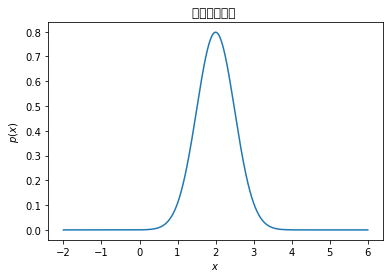

In [30]:
## rv 확률변수의 분포를 그래프로 확인
xx = np.linspace(-2,6,1000)
pdf = rv.pdf(xx) # y값 결정

plt.plot(xx,pdf)
plt.title("확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()


- 확률변수의 누적 확률분포 값 : cdf 메서드로 계산
- 누적분포함수 : P(X<=x)를 계산
    
![](../picture/누적정규.png)

In [32]:
# 확률변수 rv가 1.7보다 작은 값이 되는 확률
rv.cdf(1.7)

0.27425311775007355

- norm.isf(위치값) : 상위 위치값 % 지점
![](../picture/백프로수식.png)

2.2622002563540207

1.1775731865242638

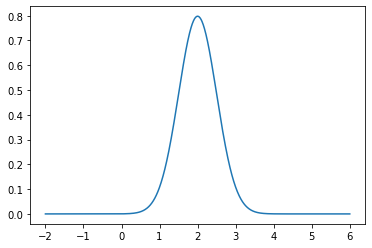

In [35]:
xx = np.linspace(-2,6,1000)
pdf = rv.pdf(xx) # y값 결정

plt.plot(xx,pdf)

# 위 그래프에서 상위 30% 지점값 반환
rv.isf(0.3)
rv.isf(0.95)

## norm.interval(구간비율)
- norm,interval(0.9) : 90% 구간 지점을 반환 = 왼쪽과 오른쪽 끝에 5% 씩 남김

![](../picture/인터발.png)

(1.1775731865242636, 2.822426813475736)

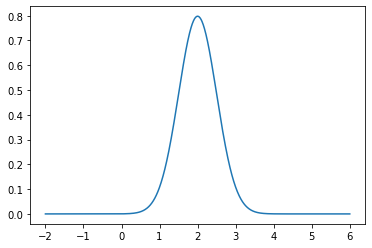

In [38]:
xx = np.linspace(-2,6,1000)
pdf = rv.pdf(xx) # y값 결정

plt.plot(xx,pdf)

#
rv.interval(0.9)

In [40]:
rv.interval(0.9)
# 동일한 방식 왼쪽과 오른쪽 끝에서 5% 씩 남김
rv.isf(0.95), rv.isf(0.05)

(1.1775731865242636, 2.822426813475736)

(1.1775731865242638, 2.8224268134757367)

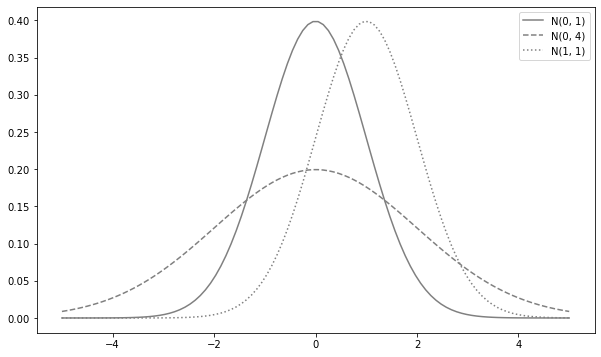

In [41]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()


## 남자 고등학생의 키 ~ N(170,5^2)의 분포를 표현하는 그래프

Text(0.5, 1.0, '남자 고등학생의 키')

Text(0.5, 0, '$x$')

Text(0, 0.5, '$p(x)$')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from c

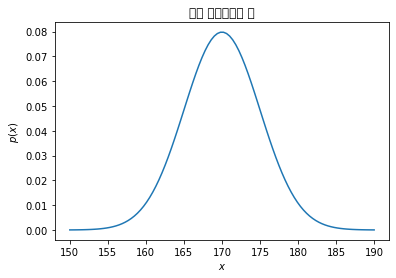

In [48]:
rv = stats.norm(170,5)

xx = np.linspace(150,190,100)
pdf = rv.pdf(xx)

plt.plot(xx,pdf)

plt.title("남자 고등학생의 키")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()


![](../picture/정규분포정리.png)

## 카이제곱분포

![](../picture/카이1.png)


- Z는 정규확률변수, 자유도는 정규분포의 갯수(n)
![](../picture/카이2.png)

In [85]:
n = 10
rv = stats.norm(0,1)

sample_size = int(1e6) # 1000000

Za_sample = rv.rvs((n, sample_size)) ## rvs 함수 :rv의 분포를 기준으로 난수 생성

Za_sample

array([[ 1.065, -0.378,  0.985, ..., -1.566,  0.37 , -0.97 ],
       [ 0.984,  0.519,  1.94 , ..., -0.263, -0.694, -0.617],
       [-1.172,  0.254, -2.265, ...,  0.457,  1.677,  0.241],
       ...,
       [-0.254,  0.392,  1.   , ...,  0.455, -0.097,  2.044],
       [ 0.885,  0.669, -0.206, ...,  1.059, -0.876, -0.882],
       [ 0.048, -0.382,  1.524, ..., -1.634, -0.135,  1.322]])

In [86]:
chi_sample = np.sum(Za_sample**2, axis=0)
chi_sample
len(chi_sample)

array([ 9.336,  9.061, 16.273, ...,  8.968,  7.561, 12.896])

1000000

## 카이제곱 분포를 따르는 확률변수 생성 : stats.chi2(n)

(array([1.016e-04, 8.001e-04, 2.881e-03, 6.877e-03, 1.283e-02, 2.081e-02,
        3.016e-02, 4.057e-02, 5.112e-02, 6.201e-02, 7.103e-02, 7.945e-02,
        8.614e-02, 9.127e-02, 9.562e-02, 9.645e-02, 9.685e-02, 9.650e-02,
        9.435e-02, 9.226e-02, 8.829e-02, 8.347e-02, 7.889e-02, 7.375e-02,
        6.845e-02, 6.334e-02, 5.834e-02, 5.389e-02, 4.859e-02, 4.368e-02,
        3.899e-02, 3.560e-02, 3.175e-02, 2.797e-02, 2.533e-02, 2.225e-02,
        1.961e-02, 1.719e-02, 1.504e-02, 1.297e-02, 1.143e-02, 9.949e-03,
        8.751e-03, 7.445e-03, 6.208e-03, 5.722e-03, 4.672e-03, 4.032e-03,
        3.421e-03, 3.010e-03, 2.587e-03, 2.282e-03, 1.755e-03, 1.615e-03,
        1.315e-03, 1.132e-03, 9.631e-04, 7.705e-04, 7.006e-04, 5.927e-04,
        5.080e-04, 4.043e-04, 3.069e-04, 2.646e-04, 2.180e-04, 2.223e-04,
        1.249e-04, 1.524e-04, 1.164e-04, 9.949e-05, 9.102e-05, 7.409e-05,
        5.080e-05, 5.715e-05, 4.445e-05, 2.963e-05, 3.810e-05, 3.175e-05,
        2.752e-05, 6.350e-06, 1.270e-0

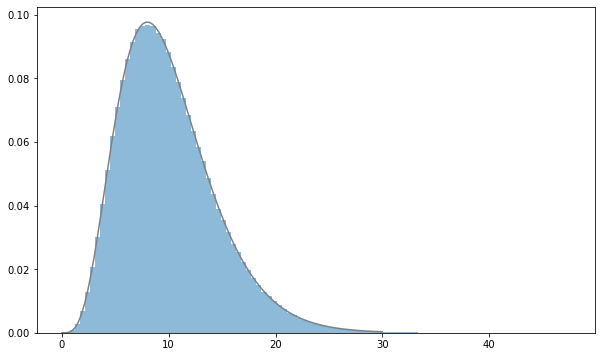

In [102]:
n = 10
rv_true = stats.chi2(n)
xs = np.linspace(0,30,100)

fig = plt.figure(figsize=(10,6)) # 그래프 틀 선언
ax=fig.add_subplot(111)


# sample 데이터 카이제곱 분포 계산 데이터를 이용한 히스토그램

ax.hist(chi_sample, bins=100, density=True, alpha=0.5, label='chis_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chif({n}))',color='gray')
plt.show()

## 자유도 변경에 따른 그래프 변경

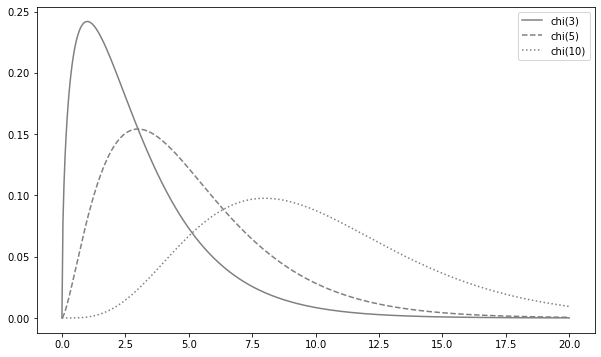

In [111]:
fig = plt.figure(figsize=(10,6)) # 그래프 틀 선언
ax=fig.add_subplot(111)

xs = np.linspace(0,20,500)

for n, ls in zip([3,5,10],linestyles):
    rv=stats.chi2(n) # 자유도가 n인 확률변수
    ax.plot(xs,rv.pdf(xs), label=f'chi({n})', ls=ls, color='gray')

ax.legend()
            

In [113]:
rv=stats.chi2(5) #자유도가 5일 때
rv.isf(0.05)
rv.isf(0.95)

11.070497693516355

1.1454762260617697

![](../picture/카이정리.png)

## t분포 - 정규분포에서 모평균의 구간 추정 등에 사용되는 확률 분포

![](../picture/t분포.png)

- 좌우 대칭인 분포
- 표준 정규분포 보다 양쪽 끝이 더 두꺼워 짐
- 자유도가 커지면 표준 정규분포에 가까워 짐

In [123]:
n= 10 
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)

Z_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(Y_sample/n)

len(t_sample)



1000000

(array([0.012, 0.014, 0.014, 0.017, 0.018, 0.019, 0.022, 0.026, 0.027,
        0.03 , 0.033, 0.038, 0.042, 0.044, 0.051, 0.056, 0.06 , 0.066,
        0.073, 0.079, 0.088, 0.098, 0.106, 0.114, 0.124, 0.135, 0.147,
        0.158, 0.17 , 0.182, 0.194, 0.207, 0.22 , 0.239, 0.25 , 0.264,
        0.282, 0.29 , 0.308, 0.32 , 0.328, 0.344, 0.351, 0.365, 0.366,
        0.38 , 0.382, 0.391, 0.394, 0.393, 0.388, 0.388, 0.391, 0.38 ,
        0.382, 0.377, 0.36 , 0.355, 0.342, 0.331, 0.319, 0.307, 0.292,
        0.278, 0.261, 0.253, 0.234, 0.218, 0.213, 0.195, 0.184, 0.169,
        0.158, 0.144, 0.133, 0.125, 0.116, 0.103, 0.099, 0.086, 0.081,
        0.074, 0.069, 0.062, 0.056, 0.051, 0.046, 0.041, 0.039, 0.036,
        0.031, 0.027, 0.025, 0.023, 0.021, 0.019, 0.017, 0.015, 0.013,
        0.013]),
 array([-3.  , -2.94, -2.88, -2.82, -2.76, -2.7 , -2.64, -2.58, -2.52,
        -2.46, -2.4 , -2.34, -2.28, -2.22, -2.16, -2.1 , -2.04, -1.98,
        -1.92, -1.86, -1.8 , -1.74, -1.68, -1.62, -1.56, -1.

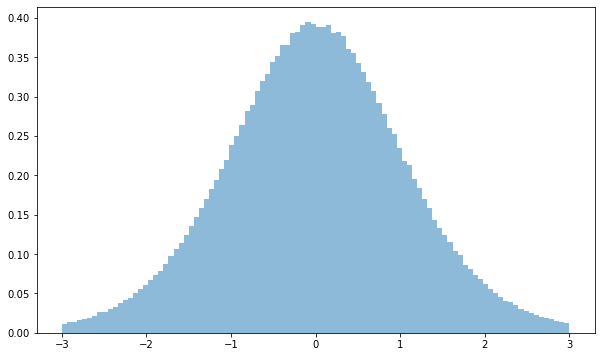

In [127]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

#t 확률변수 생성
rv = stats.t(n)
xs = np.linspace(-3,3,100)
ax.hist(t_sample,bins=100,range=(-3,3), density=True, alpha=0.5, label='sample')

(array([0.012, 0.014, 0.014, 0.017, 0.018, 0.019, 0.022, 0.026, 0.027,
        0.03 , 0.033, 0.038, 0.042, 0.044, 0.051, 0.056, 0.06 , 0.066,
        0.073, 0.079, 0.088, 0.098, 0.106, 0.114, 0.124, 0.135, 0.147,
        0.158, 0.17 , 0.182, 0.194, 0.207, 0.22 , 0.239, 0.25 , 0.264,
        0.282, 0.29 , 0.308, 0.32 , 0.328, 0.344, 0.351, 0.365, 0.366,
        0.38 , 0.382, 0.391, 0.394, 0.393, 0.388, 0.388, 0.391, 0.38 ,
        0.382, 0.377, 0.36 , 0.355, 0.342, 0.331, 0.319, 0.307, 0.292,
        0.278, 0.261, 0.253, 0.234, 0.218, 0.213, 0.195, 0.184, 0.169,
        0.158, 0.144, 0.133, 0.125, 0.116, 0.103, 0.099, 0.086, 0.081,
        0.074, 0.069, 0.062, 0.056, 0.051, 0.046, 0.041, 0.039, 0.036,
        0.031, 0.027, 0.025, 0.023, 0.021, 0.019, 0.017, 0.015, 0.013,
        0.013]),
 array([-3.  , -2.94, -2.88, -2.82, -2.76, -2.7 , -2.64, -2.58, -2.52,
        -2.46, -2.4 , -2.34, -2.28, -2.22, -2.16, -2.1 , -2.04, -1.98,
        -1.92, -1.86, -1.8 , -1.74, -1.68, -1.62, -1.56, -1.

(-3.000, 3.000)

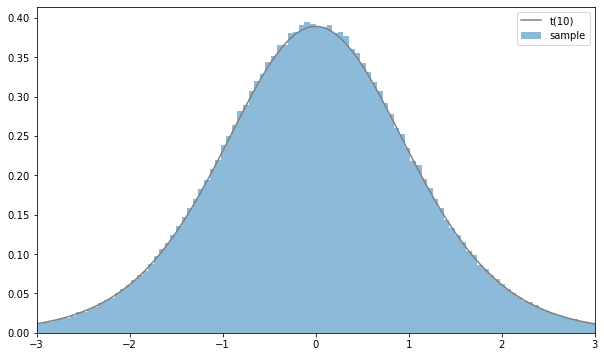

In [137]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

#t 확률변수 생성
rv = stats.t(n)
xs = np.linspace(-3,3,100)
ax.hist(t_sample,bins=100,range=(-3,3), density=True, alpha=0.5, label='sample')

# 확률밀도 함수 이용해 xs의 대응하는 y값 계산하고 그래프 그리기
ax.plot(xs,rv.pdf(xs),label=f't({n})',color='gray')
ax.legend()
ax.set_xlim(-3, 3)
plt.show()


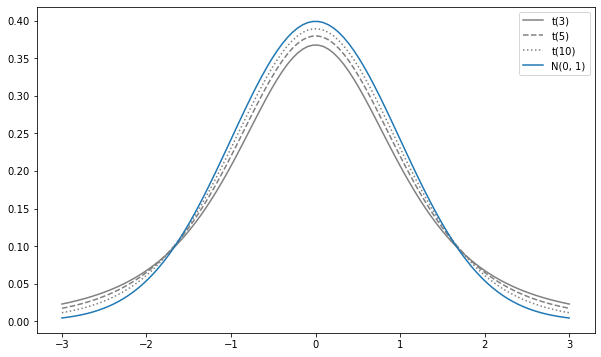

In [135]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label=f't({n})', ls=ls, color='gray')
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')
    
ax.legend()
plt.show()


In [139]:
rv = stats.t(5)
rv.isf(0.05)

2.0150483726691575

##  F분포

![](../picture/f분포.png)

In [147]:
n1 = 5
n2 = 10

rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
Y1 = rv1.rvs(sample_size)
Y2 = rv2.rvs(sample_size)

f_sample = (Y1/n1)/(Y2/n2)

(array([0.052, 0.203, 0.351, 0.475, 0.566, 0.635, 0.669, 0.689, 0.689,
        0.683, 0.669, 0.648, 0.62 , 0.6  , 0.564, 0.532, 0.499, 0.474,
        0.447, 0.417, 0.396, 0.373, 0.343, 0.322, 0.297, 0.28 , 0.257,
        0.242, 0.226, 0.214, 0.199, 0.186, 0.172, 0.164, 0.149, 0.141,
        0.131, 0.123, 0.116, 0.11 , 0.103, 0.096, 0.09 , 0.082, 0.079,
        0.075, 0.07 , 0.066, 0.06 , 0.058, 0.055, 0.051, 0.048, 0.045,
        0.044, 0.04 , 0.037, 0.036, 0.035, 0.034, 0.031, 0.029, 0.028,
        0.025, 0.025, 0.025, 0.022, 0.02 , 0.02 , 0.019, 0.017, 0.018,
        0.017, 0.016, 0.015, 0.013, 0.013, 0.013, 0.012, 0.012, 0.011,
        0.01 , 0.011, 0.01 , 0.01 , 0.008, 0.008, 0.008, 0.008, 0.008,
        0.006, 0.006, 0.007, 0.006, 0.006, 0.006, 0.005, 0.005, 0.005,
        0.005]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ,
        0.66, 0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 , 1.26,
        1.32, 1.38, 1.44, 1.5 , 1.56, 1.62, 1.68, 1.74

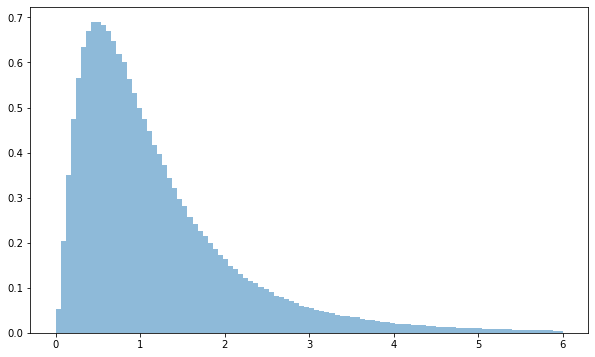

In [157]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)


ax.hist(f_sample, bins=100, range=(0, 6),
        density=True, alpha=0.5, label='f_sample')


(array([0.052, 0.203, 0.351, 0.475, 0.566, 0.635, 0.669, 0.689, 0.689,
        0.683, 0.669, 0.648, 0.62 , 0.6  , 0.564, 0.532, 0.499, 0.474,
        0.447, 0.417, 0.396, 0.373, 0.343, 0.322, 0.297, 0.28 , 0.257,
        0.242, 0.226, 0.214, 0.199, 0.186, 0.172, 0.164, 0.149, 0.141,
        0.131, 0.123, 0.116, 0.11 , 0.103, 0.096, 0.09 , 0.082, 0.079,
        0.075, 0.07 , 0.066, 0.06 , 0.058, 0.055, 0.051, 0.048, 0.045,
        0.044, 0.04 , 0.037, 0.036, 0.035, 0.034, 0.031, 0.029, 0.028,
        0.025, 0.025, 0.025, 0.022, 0.02 , 0.02 , 0.019, 0.017, 0.018,
        0.017, 0.016, 0.015, 0.013, 0.013, 0.013, 0.012, 0.012, 0.011,
        0.01 , 0.011, 0.01 , 0.01 , 0.008, 0.008, 0.008, 0.008, 0.008,
        0.006, 0.006, 0.007, 0.006, 0.006, 0.006, 0.005, 0.005, 0.005,
        0.005]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ,
        0.66, 0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 , 1.26,
        1.32, 1.38, 1.44, 1.5 , 1.56, 1.62, 1.68, 1.74

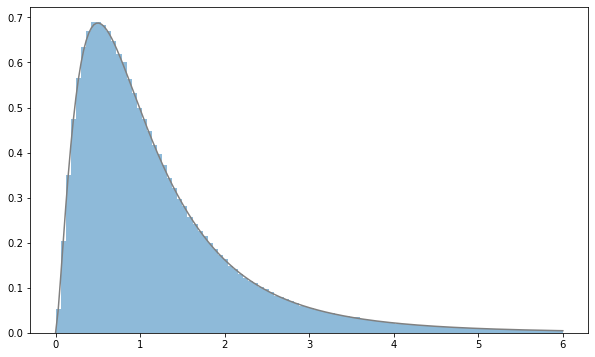

In [158]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# 자유도가 n1, n2 인 F 분포를 따르는 확률변수 rv를 생성
rv = stats.f(n1,n2)
xs = np.linspace(0,6,200)

ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})', color='gray')

ax.hist(f_sample, bins=100, range=(0, 6),
        density=True, alpha=0.5, label='f_sample')


(array([0.052, 0.203, 0.351, 0.475, 0.566, 0.635, 0.669, 0.689, 0.689,
        0.683, 0.669, 0.648, 0.62 , 0.6  , 0.564, 0.532, 0.499, 0.474,
        0.447, 0.417, 0.396, 0.373, 0.343, 0.322, 0.297, 0.28 , 0.257,
        0.242, 0.226, 0.214, 0.199, 0.186, 0.172, 0.164, 0.149, 0.141,
        0.131, 0.123, 0.116, 0.11 , 0.103, 0.096, 0.09 , 0.082, 0.079,
        0.075, 0.07 , 0.066, 0.06 , 0.058, 0.055, 0.051, 0.048, 0.045,
        0.044, 0.04 , 0.037, 0.036, 0.035, 0.034, 0.031, 0.029, 0.028,
        0.025, 0.025, 0.025, 0.022, 0.02 , 0.02 , 0.019, 0.017, 0.018,
        0.017, 0.016, 0.015, 0.013, 0.013, 0.013, 0.012, 0.012, 0.011,
        0.01 , 0.011, 0.01 , 0.01 , 0.008, 0.008, 0.008, 0.008, 0.008,
        0.006, 0.006, 0.007, 0.006, 0.006, 0.006, 0.005, 0.005, 0.005,
        0.005]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ,
        0.66, 0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 , 1.26,
        1.32, 1.38, 1.44, 1.5 , 1.56, 1.62, 1.68, 1.74

(0.000, 6.000)

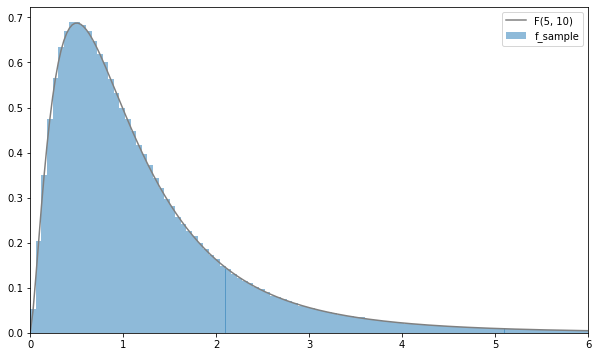

In [159]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# 자유도가 n1, n2 인 F 분포를 따르는 확률변수 rv를 생성
rv = stats.f(n1,n2)
xs = np.linspace(0,6,200)

ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})', color='gray')

ax.hist(f_sample, bins=100, range=(0, 6),
        density=True, alpha=0.5, label='f_sample')




ax.legend()
ax.set_xlim(0, 6) ## 0 이하 안나오게
plt.show()

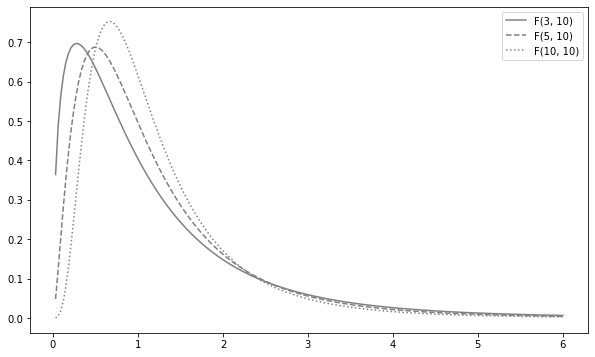

In [160]:
# 자유도가 낮을 수록 왼쪽으로 치우쳐짐

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 200)[1:]
for n1, ls in zip([3, 5, 10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs),
            label=f'F({n1}, 10)', ls=ls, color='gray')
    
ax.legend()
plt.show()

